# Mod 4 Assessment Review
Agenda Today:
- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import seaborn as sns

## Part I. PCA

In [3]:
# Import the mpg dataset and investiate data
mpg = sns.load_dataset('mpg')

In [4]:
mpg.info()

mpg.describe()

mpg_features = mpg.iloc[:, :5]

mpg_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


### Your work

#### step 1 - standardize and scale

Using StandardScaler, create a dataframe of scaled values with the same column names

Assign it to the variable `mpg_scaled`

In [5]:
scaler = StandardScaler()
mpg_scaled = pd.DataFrame(scaler.fit_transform(mpg_features), columns=mpg_features.columns)

#don't forget to drop NANs
mpg_scaled.dropna(axis = 0, inplace = True)

In [6]:
mpg_scaled.head()

,mpg,cylinders,displacement,horsepower,weight
0,-0.706439,1.498191,1.090604,0.664133,0.630870
1,-1.090751,1.498191,1.503514,1.574594,0.854333
2,-0.706439,1.498191,1.196232,1.184397,0.550470
3,-0.962647,1.498191,1.061796,1.184397,0.546923
4,-0.834543,1.498191,1.042591,0.924265,0.565841


In [45]:
mpg_features.head()

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


#### step 2 fit our pca

Find both:
- the linear variation explained by each principle component
- the number of principle components required to explain 90% of the linear variation

Fit a PCA object to `mpg_scaled` using the number of principle components in the last bullet point above

In [11]:
pca_explore = PCA()
pca_explore.fit(mpg_scaled)

print(pca_explore.explained_variance_)
pca_explore.explained_variance_ratio_

[4.46283072 0.26687393 0.16785825 0.0943314  0.03684612]


array([0.88746492, 0.05306974, 0.03337978, 0.01875846, 0.00732711])

#### Wait . . . why is the variance the first principle component explains greater than 1??

In short: that is the amount of variance in the first principle component.

The PCA transformation preserves the amount of total variance in the original dataset.

That variance is then distributed to new variables (the principle components themselves)

"explained variance of each component" is how much variance that principle component contains.

"explained variance ratio of each component" is how much of the total variance that principle component explains

see [here](https://ro-che.info/articles/2017-12-11-pca-explained-variance) for a good walk-through on both the abstract and nitty-gritty lin alg levels

In [12]:
mpg_pca = PCA(n_components = .9)
mpg_pca.fit(mpg_scaled)

mpg_pca.explained_variance_

array([4.46283072, 0.26687393])

2

#### What are some of the advantages and disadvantages of using PCA?

Describe here

Adv

1) Dim reduction (why do we want to do this?)

2) Creating variables that are orthogonal to each other / lower multicoll (why do we want to do this?)

Disadv

1) Assumes linear variation

2) Loses interpretability

3) Requires data cleaning before use

## Part II. Clustering

- Describe the algorithm of [K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) Clustering 

In [13]:
# Steps of the k-means clustering algorithm: 
# 1. To start, k starting "mean" points are randomly generated. 
# 2. Then, each observation point is assigned to the "mean" point closest to it. 
# 3. The centroid of each one of the k clusters becomes the new "mean". 
# Steps 2 and 3 are repeated until the centroids move no more than an accepted
# tolerance. 

#### Build a KMeans clustering model on the `mpg_scaled` data

- use 3, 4, and 5 clusters
- use a metric to evaluate which cluster is better

[0.5676026716378998,
 0.5214421123757329,
 0.4628339746118253,
 0.43368966377336043]

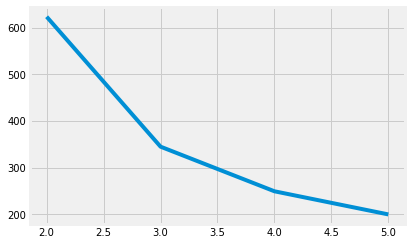

In [14]:
# building a k-means clustering model in general for one cluster
kmeans = KMeans(n_clusters = 3)
kmeans.fit(mpg_scaled)

#get SSE for multiple numbers of clusters (example here uses list comprehension)
kmeans_sse = [
    model = KMeans(n_clusters=n)
    model
        .fit(mpg_scaled)
        .inertia_
    for n
    in [2,3,4,5]
]
plt.plot([2,3,4,5], kmeans_sse);


#get silhouette scores for multiple numbers of clusters (example here uses for-loop)
sil_scores = []
for n in range(2,6):
    model = KMeans(n_clusters=n)
    
    model.fit(mpg_scaled)
    
    sil_score = silhouette_score(mpg_scaled, model.labels_)
    
    sil_scores.append(sil_score)

# #get silhouette scores for multiple numbers of clusters (example here uses list comprehension)
sil_scores = [
    silhouette_score(
        mpg_scaled,
        KMeans(n_clusters=n)
            .fit(mpg_scaled)
            .labels_
    )
    for n
    in [2,3,4,5]
]

sil_scores

In [8]:
# we can get the labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2,

In [ ]:
# what are some of the ways to evaluate k-means?

# how to select the best value of k using those metrics?